In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 

In [2]:
file_path = "Titanic-Dataset.csv"

df = pd.read_csv(file_path)

print("1. DataFrame:")
print(df)

print("\n2. Jumlah Baris dan Kolom:")
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

print("\n3. Tipe Data Setiap Kolom:")
print(df.dtypes)

print("\n4. Data Teratas:")
print(df.head())

print("\n5. Statistik Deskriptif Numerik:")
print(df.describe())

1. DataFrame:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ... 

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())

median_age = df['Age'].median()

print("Median usia setelah pengisian nilai hilang:", median_age)

kolom_angka = 'Age'  # Contoh: Ubah 'Age' dengan nama kolom numerik lainnya

df[kolom_angka] = df[kolom_angka].fillna(df[kolom_angka].mean())

print(f"Mean dari kolom {kolom_angka} setelah mengisi nilai hilang:")
print(df[kolom_angka].mean())

kolom_angka = 'Age'  # Contoh: Ubah 'Age' dengan nama kolom numerik lainnya

df[kolom_angka] = df[kolom_angka].fillna(df[kolom_angka].mean())

print(f"Mean dari kolom {kolom_angka} setelah mengisi nilai hilang:")
print(df[kolom_angka].mean())

Median usia setelah pengisian nilai hilang: 28.0
Mean dari kolom Age setelah mengisi nilai hilang:
29.36158249158249
Mean dari kolom Age setelah mengisi nilai hilang:
29.36158249158249


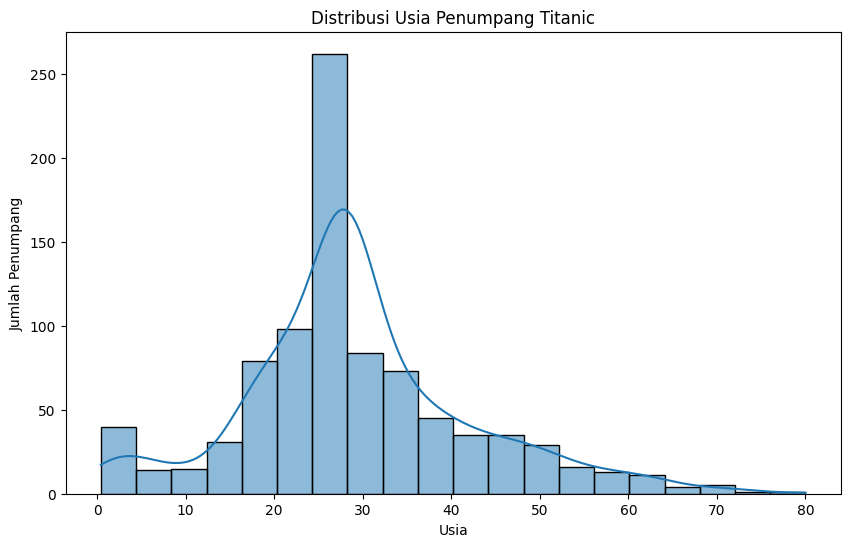

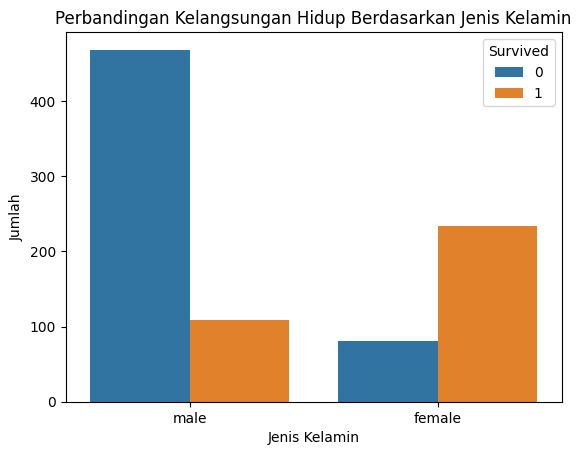

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribusi Usia Penumpang Titanic')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Perbandingan Kelangsungan Hidup Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()



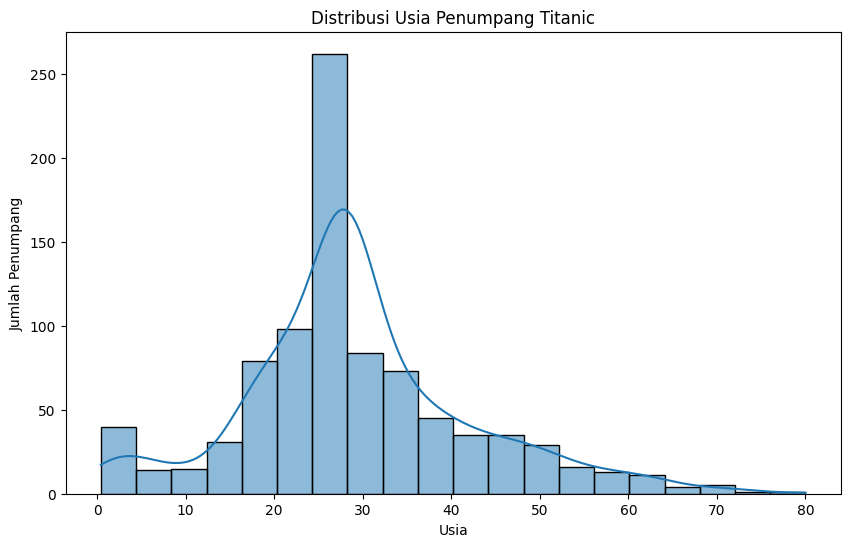

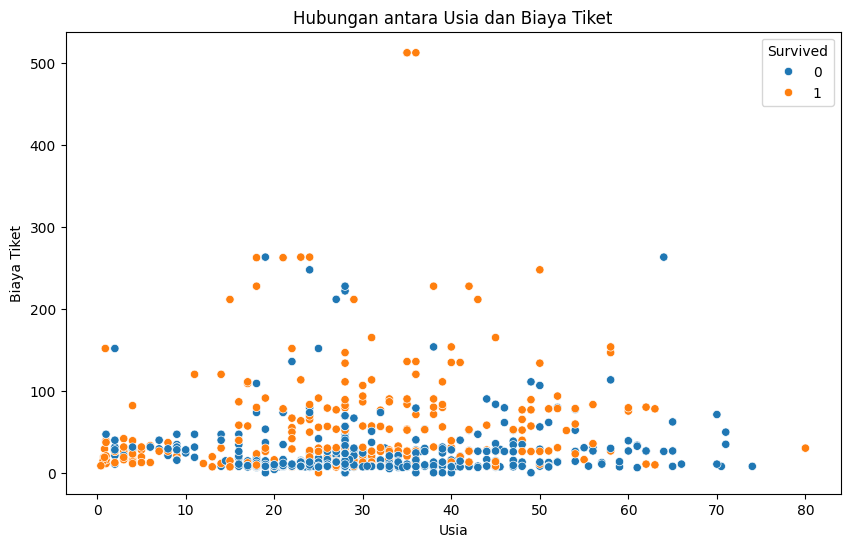

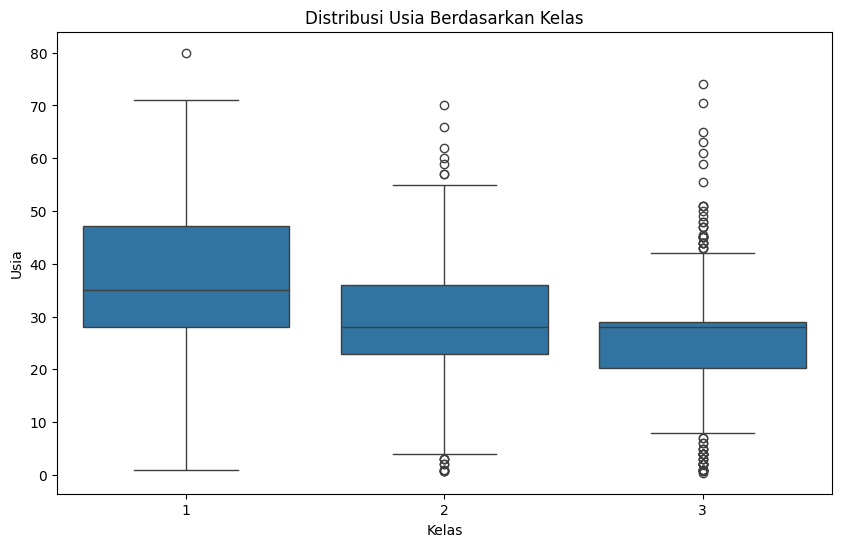

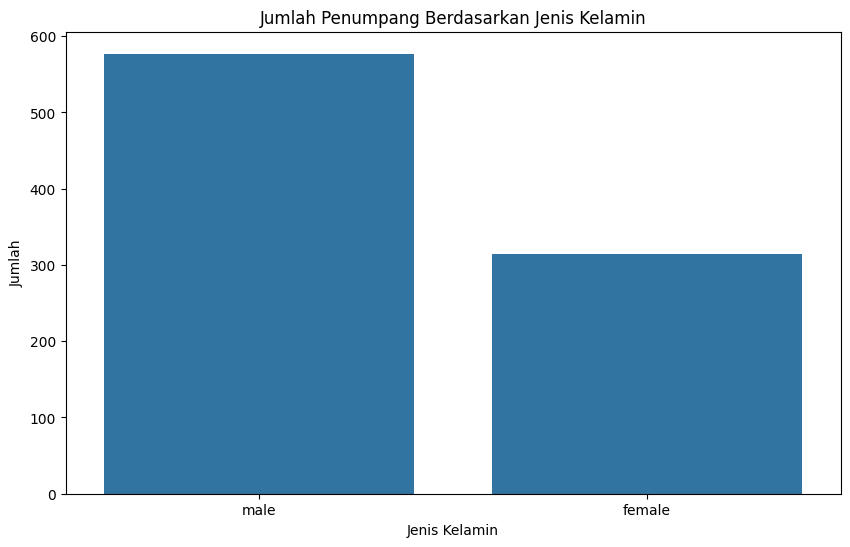

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribusi Usia Penumpang Titanic')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Hubungan antara Usia dan Biaya Tiket')
plt.xlabel('Usia')
plt.ylabel('Biaya Tiket')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribusi Usia Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Usia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

In [6]:
print("Jumlah nilai hilang pada setiap kolom:")
print(df.isnull().sum())

print("\nJumlah nilai hilang setelah imputasi:")
print(df.isnull().sum())

Jumlah nilai hilang pada setiap kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Jumlah nilai hilang setelah imputasi:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Mengisi nilai hilang dengan median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mengisi nilai hilang dengan kategori yang paling sering muncul
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

processed_data = preprocessor.fit_transform(df)
df_encoded = pd.DataFrame(processed_data, columns=preprocessor.get_feature_names_out())

print(df_encoded)

     num__Age  num__Fare  cat__Sex_female  cat__Sex_male  cat__Embarked_C  \
0   -0.565736  -0.502445              0.0            1.0              0.0   
1    0.663861   0.786845              1.0            0.0              1.0   
2   -0.258337  -0.488854              1.0            0.0              0.0   
3    0.433312   0.420730              1.0            0.0              0.0   
4    0.433312  -0.486337              0.0            1.0              0.0   
..        ...        ...              ...            ...              ...   
886 -0.181487  -0.386671              0.0            1.0              0.0   
887 -0.796286  -0.044381              1.0            0.0              0.0   
888 -0.104637  -0.176263              1.0            0.0              0.0   
889 -0.258337  -0.044381              0.0            1.0              1.0   
890  0.202762  -0.492378              0.0            1.0              0.0   

     cat__Embarked_Q  cat__Embarked_S  
0                0.0              1

In [15]:
X = df.drop('Survived', axis=1)  # Menghapus kolom 'Survived' dari data fitur
y = df['Survived']

# pipeline
X_processed = preprocessor.fit_transform(X) 

# data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42) 

# model
model = LogisticRegression()

# data latih
model.fit(X_train, y_train)

# data uji
predictions = model.predict(X_test)

print(predictions) 

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]


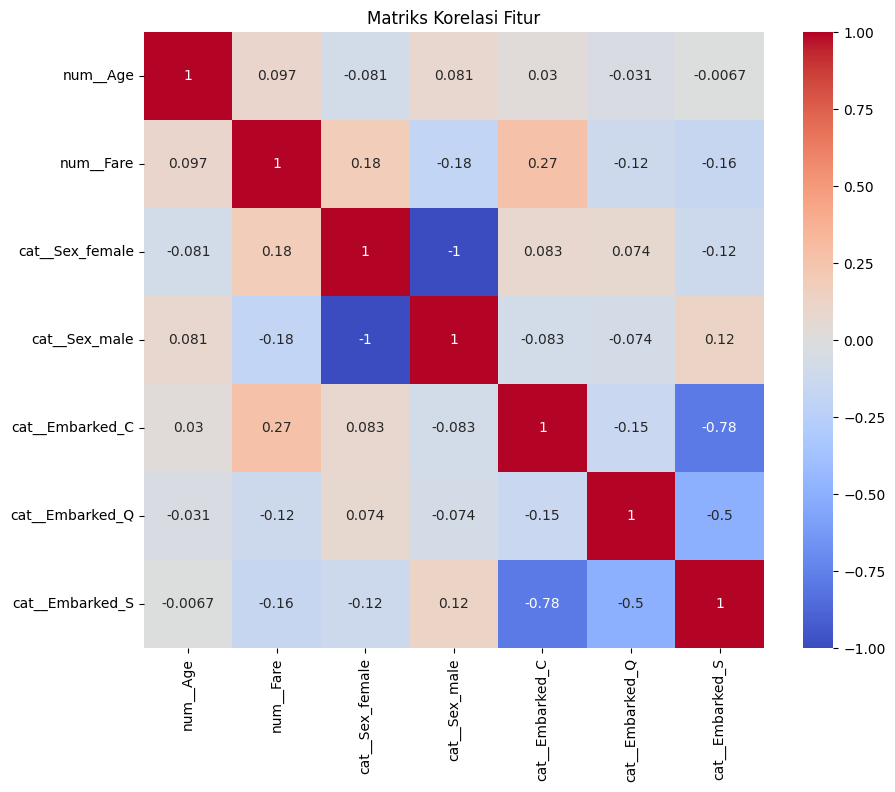

In [16]:
#matriks korelasi
corr_matrix = df_encoded.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur')
plt.show()

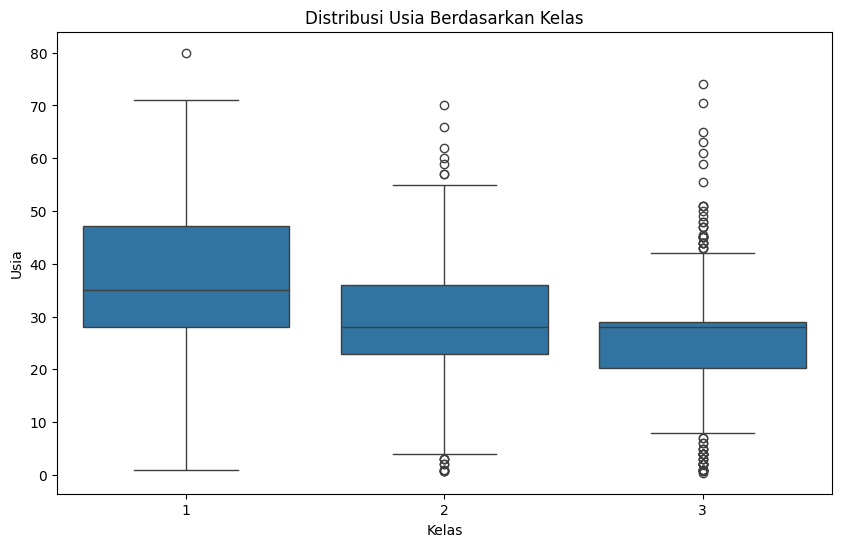

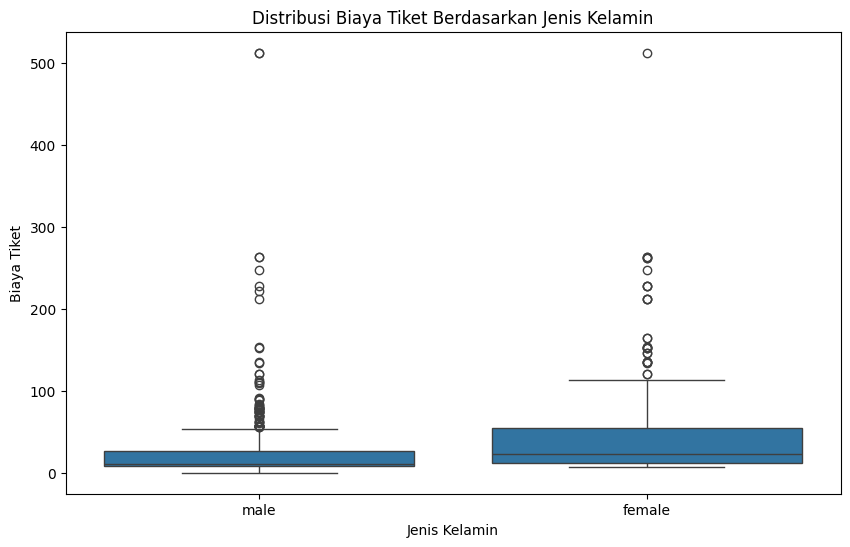

In [17]:
# Boxplot berdasarkan kelas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribusi Usia Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Usia')
plt.show()

# Boxplot berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Fare', data=df)
plt.title('Distribusi Biaya Tiket Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Biaya Tiket')
plt.show()